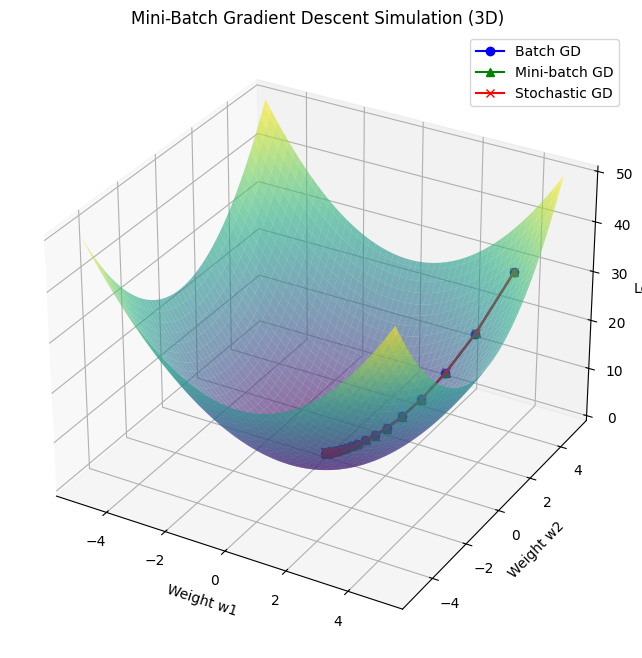

In [1]:
# mini_batch_3d_simulation.py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Define the loss function ---
def loss_function(w1, w2):
    """A simple quadratic bowl loss surface."""
    return w1**2 + w2**2

def gradient(w1, w2):
    """Gradient of the loss function."""
    return np.array([2*w1, 2*w2])

# --- Simulation settings ---
np.random.seed(42)
eta = 0.1            # Learning rate
epochs = 50          # Number of iterations
batch_size = 5       # Mini-batch size

# Create synthetic 'data' to simulate stochasticity
data_points = 100
w1_data = np.random.randn(data_points)
w2_data = np.random.randn(data_points)

# --- Initialize positions ---
w_batch = np.array([4.0, 4.0])
w_sgd = np.array([4.0, 4.0])
w_mini = np.array([4.0, 4.0])

# --- Track paths ---
path_batch = [w_batch.copy()]
path_sgd = [w_sgd.copy()]
path_mini = [w_mini.copy()]

# --- Training loops ---
for epoch in range(epochs):
    # Batch Gradient Descent
    grad_batch = gradient(*w_batch)
    w_batch -= eta * grad_batch
    path_batch.append(w_batch.copy())

    # Stochastic Gradient Descent (random sample)
    i = np.random.randint(0, data_points)
    grad_sgd = gradient(w_sgd[0] + 0.1*w1_data[i], w_sgd[1] + 0.1*w2_data[i])
    w_sgd -= eta * grad_sgd
    path_sgd.append(w_sgd.copy())

    # Mini-batch Gradient Descent
    batch_indices = np.random.choice(data_points, batch_size, replace=False)
    grads = np.zeros(2)
    for j in batch_indices:
        grads += gradient(w_mini[0] + 0.1*w1_data[j], w_mini[1] + 0.1*w2_data[j])
    grads /= batch_size
    w_mini -= eta * grads
    path_mini.append(w_mini.copy())

# --- Convert paths to numpy arrays ---
path_batch = np.array(path_batch)
path_sgd = np.array(path_sgd)
path_mini = np.array(path_mini)

# --- Create the 3D loss surface ---
w1 = np.linspace(-5, 5, 100)
w2 = np.linspace(-5, 5, 100)
W1, W2 = np.meshgrid(w1, w2)
Z = loss_function(W1, W2)

# --- 3D Visualization ---
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
ax.plot_surface(W1, W2, Z, cmap='viridis', alpha=0.6)

# Plot optimization paths
ax.plot(path_batch[:,0], path_batch[:,1], loss_function(path_batch[:,0], path_batch[:,1]), 
        color='blue', marker='o', label='Batch GD')
ax.plot(path_mini[:,0], path_mini[:,1], loss_function(path_mini[:,0], path_mini[:,1]), 
        color='green', marker='^', label='Mini-batch GD')
ax.plot(path_sgd[:,0], path_sgd[:,1], loss_function(path_sgd[:,0], path_sgd[:,1]), 
        color='red', marker='x', label='Stochastic GD')

# Labels and legend
ax.set_title("Mini-Batch Gradient Descent Simulation (3D)")
ax.set_xlabel("Weight w1")
ax.set_ylabel("Weight w2")
ax.set_zlabel("Loss")
ax.legend()
plt.show()


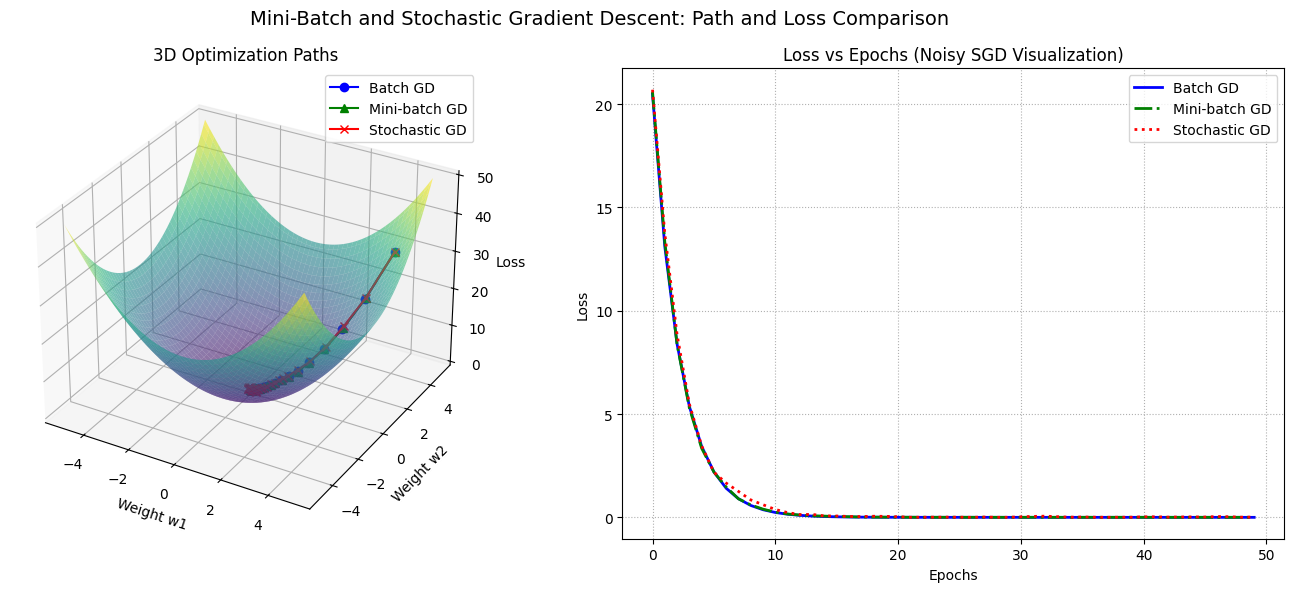

In [2]:
# mini_batch_3d_and_loss_simulation.py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Define loss function and gradient ---
def loss_function(w1, w2):
    """Quadratic bowl surface."""
    return w1**2 + w2**2

def gradient(w1, w2):
    """Gradient of the loss function."""
    return np.array([2*w1, 2*w2])

# --- Parameters ---
np.random.seed(42)
eta = 0.1
epochs = 50
batch_size = 5
data_points = 100

# --- Synthetic data for noise simulation ---
w1_data = np.random.randn(data_points)
w2_data = np.random.randn(data_points)

# --- Initialize weights ---
w_batch = np.array([4.0, 4.0])
w_sgd = np.array([4.0, 4.0])
w_mini = np.array([4.0, 4.0])

# --- Track paths and loss values ---
path_batch, path_sgd, path_mini = [w_batch.copy()], [w_sgd.copy()], [w_mini.copy()]
loss_batch, loss_sgd, loss_mini = [], [], []

# --- Training Loop ---
for epoch in range(epochs):
    # Batch GD
    grad_batch = gradient(*w_batch)
    w_batch -= eta * grad_batch
    loss_batch.append(loss_function(*w_batch))
    path_batch.append(w_batch.copy())

    # SGD
    i = np.random.randint(0, data_points)
    grad_sgd = gradient(w_sgd[0] + 0.3*w1_data[i], w_sgd[1] + 0.3*w2_data[i])
    w_sgd -= eta * grad_sgd
    loss_sgd.append(loss_function(*w_sgd))
    path_sgd.append(w_sgd.copy())

    # Mini-batch GD
    batch_indices = np.random.choice(data_points, batch_size, replace=False)
    grads = np.zeros(2)
    for j in batch_indices:
        grads += gradient(w_mini[0] + 0.2*w1_data[j], w_mini[1] + 0.2*w2_data[j])
    grads /= batch_size
    w_mini -= eta * grads
    loss_mini.append(loss_function(*w_mini))
    path_mini.append(w_mini.copy())

# Convert paths to numpy arrays
path_batch = np.array(path_batch)
path_sgd = np.array(path_sgd)
path_mini = np.array(path_mini)

# --- 3D Surface Plot ---
w1 = np.linspace(-5, 5, 100)
w2 = np.linspace(-5, 5, 100)
W1, W2 = np.meshgrid(w1, w2)
Z = loss_function(W1, W2)

fig = plt.figure(figsize=(14, 6))

# (1) 3D Path Visualization
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(W1, W2, Z, cmap='viridis', alpha=0.6)
ax.plot(path_batch[:,0], path_batch[:,1], loss_function(path_batch[:,0], path_batch[:,1]),
        color='blue', marker='o', label='Batch GD')
ax.plot(path_mini[:,0], path_mini[:,1], loss_function(path_mini[:,0], path_mini[:,1]),
        color='green', marker='^', label='Mini-batch GD')
ax.plot(path_sgd[:,0], path_sgd[:,1], loss_function(path_sgd[:,0], path_sgd[:,1]),
        color='red', marker='x', label='Stochastic GD')
ax.set_title("3D Optimization Paths")
ax.set_xlabel("Weight w1")
ax.set_ylabel("Weight w2")
ax.set_zlabel("Loss")
ax.legend()

# (2) Loss Curve Visualization
ax2 = fig.add_subplot(122)
ax2.plot(loss_batch, color='blue', linewidth=2, label='Batch GD')
ax2.plot(loss_mini, color='green', linestyle='-.', linewidth=2, label='Mini-batch GD')
ax2.plot(loss_sgd, color='red', linestyle=':', linewidth=2, label='Stochastic GD')
ax2.set_title("Loss vs Epochs (Noisy SGD Visualization)")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend()
ax2.grid(True, linestyle=':')

plt.suptitle("Mini-Batch and Stochastic Gradient Descent: Path and Loss Comparison", fontsize=14)
plt.tight_layout()
plt.show()


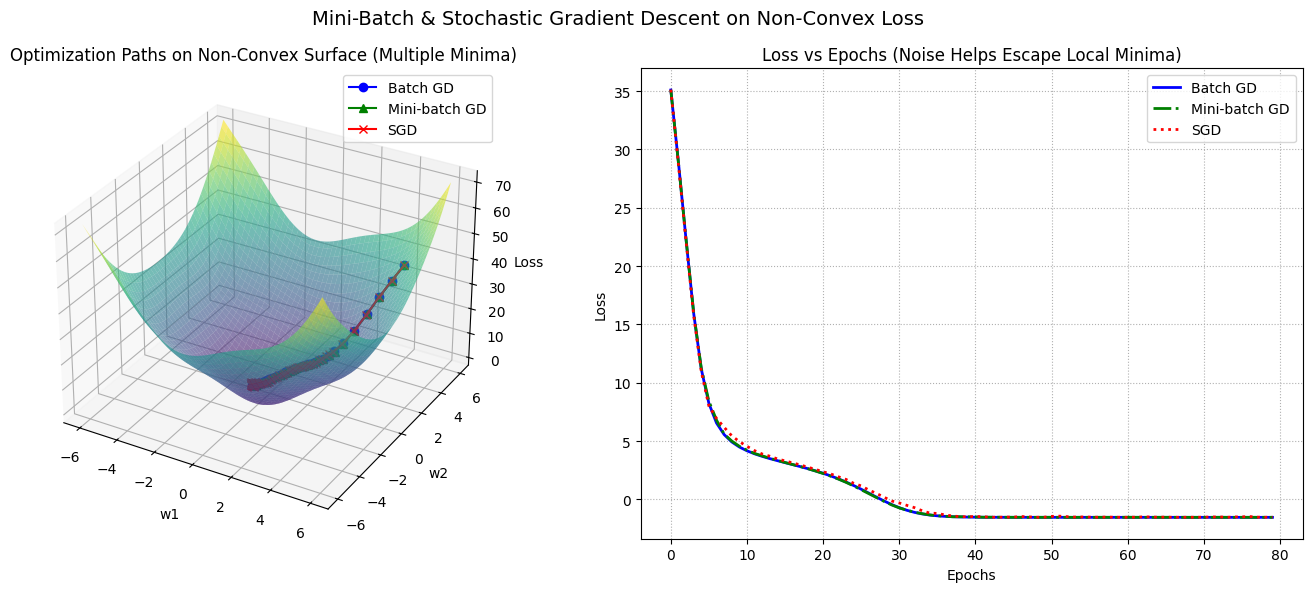

In [3]:
# multi_minima_simulation.py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Non-convex Loss Function ---
def loss_function(w1, w2):
    """Loss with multiple local minima."""
    return w1**2 + w2**2 + 3*np.sin(w1)*np.cos(w2)

def gradient(w1, w2):
    """Gradient of the loss function."""
    dw1 = 2*w1 + 3*np.cos(w1)*np.cos(w2)
    dw2 = 2*w2 - 3*np.sin(w1)*np.sin(w2)
    return np.array([dw1, dw2])

# --- Parameters ---
np.random.seed(42)
eta = 0.05          # learning rate
epochs = 80
batch_size = 5
data_points = 100

# --- Synthetic noise data ---
w1_data = np.random.randn(data_points)
w2_data = np.random.randn(data_points)

# --- Initialize weights ---
w_batch = np.array([4.5, 4.5])
w_sgd = np.array([4.5, 4.5])
w_mini = np.array([4.5, 4.5])

# --- Track paths and losses ---
path_batch, path_sgd, path_mini = [w_batch.copy()], [w_sgd.copy()], [w_mini.copy()]
loss_batch, loss_sgd, loss_mini = [], [], []

# --- Training Loops ---
for epoch in range(epochs):
    # Batch GD
    grad_b = gradient(*w_batch)
    w_batch -= eta * grad_b
    loss_batch.append(loss_function(*w_batch))
    path_batch.append(w_batch.copy())

    # SGD
    i = np.random.randint(0, data_points)
    grad_s = gradient(w_sgd[0] + 0.3*w1_data[i], w_sgd[1] + 0.3*w2_data[i])
    w_sgd -= eta * grad_s
    loss_sgd.append(loss_function(*w_sgd))
    path_sgd.append(w_sgd.copy())

    # Mini-batch GD
    batch_indices = np.random.choice(data_points, batch_size, replace=False)
    grads = np.zeros(2)
    for j in batch_indices:
        grads += gradient(w_mini[0] + 0.2*w1_data[j], w_mini[1] + 0.2*w2_data[j])
    grads /= batch_size
    w_mini -= eta * grads
    loss_mini.append(loss_function(*w_mini))
    path_mini.append(w_mini.copy())

# Convert to arrays
path_batch = np.array(path_batch)
path_sgd = np.array(path_sgd)
path_mini = np.array(path_mini)

# --- Create Surface ---
w1 = np.linspace(-6, 6, 200)
w2 = np.linspace(-6, 6, 200)
W1, W2 = np.meshgrid(w1, w2)
Z = loss_function(W1, W2)

# --- Plot 3D Surface + Paths ---
fig = plt.figure(figsize=(14, 6))

# (1) 3D Path Visualization
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(W1, W2, Z, cmap='viridis', alpha=0.6)
ax.plot(path_batch[:,0], path_batch[:,1], loss_function(path_batch[:,0], path_batch[:,1]), 
        color='blue', marker='o', label='Batch GD')
ax.plot(path_mini[:,0], path_mini[:,1], loss_function(path_mini[:,0], path_mini[:,1]), 
        color='green', marker='^', label='Mini-batch GD')
ax.plot(path_sgd[:,0], path_sgd[:,1], loss_function(path_sgd[:,0], path_sgd[:,1]), 
        color='red', marker='x', label='SGD')
ax.set_title("Optimization Paths on Non-Convex Surface (Multiple Minima)")
ax.set_xlabel("w1")
ax.set_ylabel("w2")
ax.set_zlabel("Loss")
ax.legend()

# (2) Loss vs Epochs
ax2 = fig.add_subplot(122)
ax2.plot(loss_batch, color='blue', label='Batch GD', linewidth=2)
ax2.plot(loss_mini, color='green', linestyle='-.', label='Mini-batch GD', linewidth=2)
ax2.plot(loss_sgd, color='red', linestyle=':', label='SGD', linewidth=2)
ax2.set_title("Loss vs Epochs (Noise Helps Escape Local Minima)")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend()
ax2.grid(True, linestyle=':')

plt.suptitle("Mini-Batch & Stochastic Gradient Descent on Non-Convex Loss", fontsize=14)
plt.tight_layout()
plt.show()


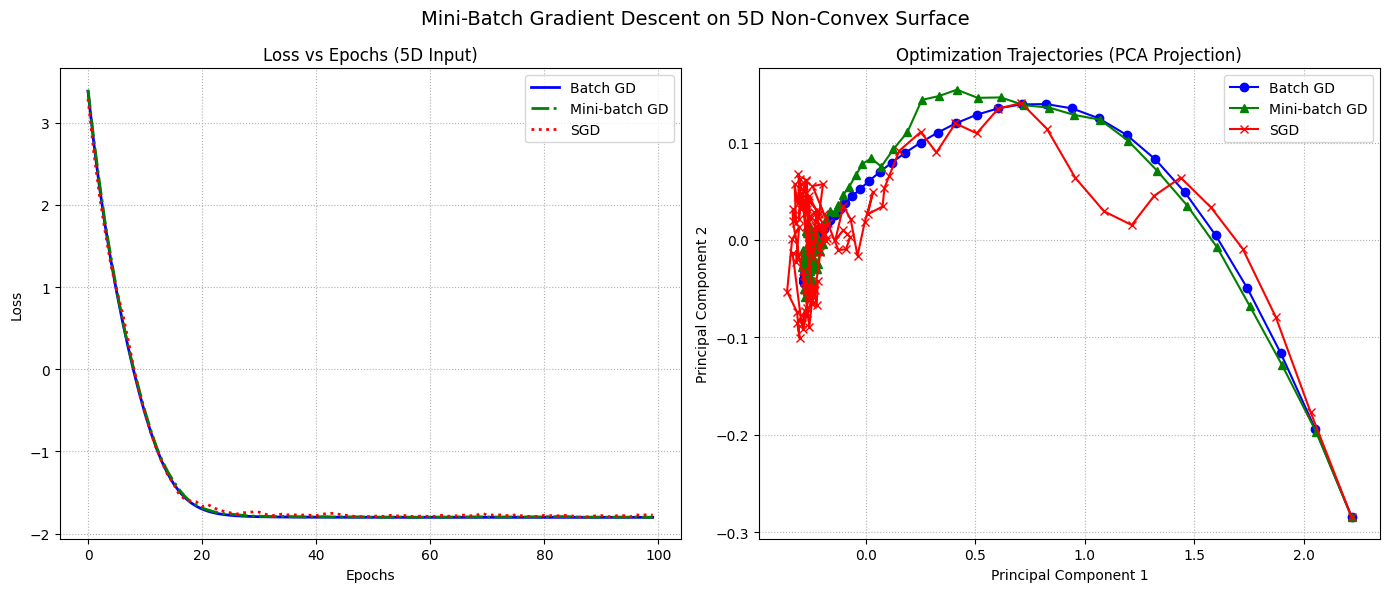

In [4]:
# multi_input_minibatch_simulation.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# --- Non-convex multi-input loss function ---
def loss_function(w):
    """Loss with multiple local minima for 5D input vector."""
    # Sum of squared weights + some sine/cosine oscillations
    return np.sum(w**2) + 2*np.sin(w[0])*np.cos(w[1]) + np.sin(w[2]*w[3]) - np.cos(w[4])

def gradient(w):
    """Analytical gradient of the above function."""
    g = np.zeros_like(w)
    g[0] = 2*w[0] + 2*np.cos(w[0])*np.cos(w[1])
    g[1] = 2*w[1] - 2*np.sin(w[0])*np.sin(w[1])
    g[2] = 2*w[2] + np.cos(w[2]*w[3])*w[3]
    g[3] = 2*w[3] + np.cos(w[2]*w[3])*w[2]
    g[4] = 2*w[4] + np.sin(w[4])
    return g

# --- Parameters ---
np.random.seed(42)
eta = 0.05
epochs = 100
batch_size = 10
data_points = 200
num_features = 5

# --- Synthetic noise data ---
noise = np.random.randn(data_points, num_features)

# --- Initialize weights ---
w_batch = np.random.randn(num_features)
w_mini = w_batch.copy()
w_sgd = w_batch.copy()

# --- Track paths and losses ---
path_batch, path_mini, path_sgd = [w_batch.copy()], [w_mini.copy()], [w_sgd.copy()]
loss_batch, loss_mini, loss_sgd = [], [], []

# --- Training Loop ---
for epoch in range(epochs):
    # Batch Gradient Descent
    grad_b = gradient(w_batch)
    w_batch -= eta * grad_b
    loss_batch.append(loss_function(w_batch))
    path_batch.append(w_batch.copy())

    # Stochastic Gradient Descent
    i = np.random.randint(0, data_points)
    noisy_input = w_sgd + 0.2 * noise[i]
    grad_s = gradient(noisy_input)
    w_sgd -= eta * grad_s
    loss_sgd.append(loss_function(w_sgd))
    path_sgd.append(w_sgd.copy())

    # Mini-batch Gradient Descent
    batch_indices = np.random.choice(data_points, batch_size, replace=False)
    grads = np.zeros(num_features)
    for j in batch_indices:
        noisy_input = w_mini + 0.2 * noise[j]
        grads += gradient(noisy_input)
    grads /= batch_size
    w_mini -= eta * grads
    loss_mini.append(loss_function(w_mini))
    path_mini.append(w_mini.copy())

# Convert to arrays
path_batch = np.array(path_batch)
path_mini = np.array(path_mini)
path_sgd = np.array(path_sgd)

# --- Dimensionality Reduction (PCA for visualization) ---
pca = PCA(n_components=2)
all_paths = np.vstack([path_batch, path_mini, path_sgd])
pca.fit(all_paths)

proj_batch = pca.transform(path_batch)
proj_mini = pca.transform(path_mini)
proj_sgd = pca.transform(path_sgd)

# --- Plot results ---
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 1️⃣ Loss vs Epochs
ax[0].plot(loss_batch, color='blue', linewidth=2, label='Batch GD')
ax[0].plot(loss_mini, color='green', linestyle='-.', linewidth=2, label='Mini-batch GD')
ax[0].plot(loss_sgd, color='red', linestyle=':', linewidth=2, label='SGD')
ax[0].set_title("Loss vs Epochs (5D Input)")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()
ax[0].grid(True, linestyle=':')

# 2️⃣ PCA Projection of optimization paths
ax[1].plot(proj_batch[:,0], proj_batch[:,1], 'o-', color='blue', label='Batch GD')
ax[1].plot(proj_mini[:,0], proj_mini[:,1], '^-', color='green', label='Mini-batch GD')
ax[1].plot(proj_sgd[:,0], proj_sgd[:,1], 'x-', color='red', label='SGD')
ax[1].set_title("Optimization Trajectories (PCA Projection)")
ax[1].set_xlabel("Principal Component 1")
ax[1].set_ylabel("Principal Component 2")
ax[1].legend()
ax[1].grid(True, linestyle=':')

plt.suptitle("Mini-Batch Gradient Descent on 5D Non-Convex Surface", fontsize=14)
plt.tight_layout()
plt.show()
